In [1]:
from _element import feature_control as ft_c

In [2]:
from _usecase import algorithm_prophet as prpt

In [3]:
import pandas as pd

In [4]:
from datetime import datetime

In [5]:
from _element import varr

In [6]:
INPUT_FILENAME= 'KPP일별투입(10_17)_withcompanycode.xlsx'

In [7]:
df_raw= ft_c.xlsx_opener(varr.PJ_DIR+varr.DF_DIR, INPUT_FILENAME)

In [8]:
df_temp= ft_c.xlsx_opener(varr.PJ_DIR+varr.TEMP_DATA_DIR, 'temp_data_merged.xlsx')

In [9]:
y_col= df_raw.columns.values.tolist()

In [10]:
try:
    y_col.remove('ds')
except ValueError:
    pass

In [11]:
y_col

[227645, 230054, 247467, 265812, 269255, 283639]

In [12]:
x_col= df_temp.columns.values.tolist()

In [13]:
x_col

['ds', 'temp_max', 'temp_min', 'rain_amount']

In [14]:
df_raw['ds']= pd.to_datetime(df_raw['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [15]:
df_temp['ds']= pd.to_datetime(df_temp['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [16]:
df_raw= pd.merge(df_raw, df_temp, how='inner', on='ds')

In [17]:
df_raw.head()

,ds,227645,230054,247467,265812,269255,283639,temp_max,temp_min,rain_amount
0,2010-07-01,512,0,2496,1248,1264,746,30.500000,24.900000,0.0
1,2010-07-02,992,0,2800,1140,768,681,25.799999,22.700001,70.0
2,2010-07-03,512,0,1024,992,768,899,25.600000,22.600000,1.0
3,2010-07-04,0,0,0,0,0,0,29.700001,23.100000,0.0
4,2010-07-05,1204,0,2496,1056,1024,459,30.600000,21.799999,0.0


In [18]:
df_weekday_0= df_raw.loc[df_raw.ds.apply(lambda x: x.weekday())==0]
df_weekday_1= df_raw.loc[df_raw.ds.apply(lambda x: x.weekday())==1]
df_weekday_2= df_raw.loc[df_raw.ds.apply(lambda x: x.weekday())==2]
df_weekday_3= df_raw.loc[df_raw.ds.apply(lambda x: x.weekday())==3]
df_weekday_4= df_raw.loc[df_raw.ds.apply(lambda x: x.weekday())==4]
df_weekday_5= df_raw.loc[df_raw.ds.apply(lambda x: x.weekday())==5]
df_weekday_6= df_raw.loc[df_raw.ds.apply(lambda x: x.weekday())==6]

In [19]:
result_dict= {}
for y in y_col:
    result_dict[y]= {
                    'mon': prpt.Bayseian2(df_weekday_0, varr.FORECASTDAY, y, x_col, 'week'),\
                    'tue': prpt.Bayseian2(df_weekday_1, varr.FORECASTDAY, y, x_col, 'week'),\
                    'wed': prpt.Bayseian2(df_weekday_2, varr.FORECASTDAY, y, x_col, 'week'),\
                    'thu': prpt.Bayseian2(df_weekday_3, varr.FORECASTDAY, y, x_col, 'week'),\
                    'pri': prpt.Bayseian2(df_weekday_4, varr.FORECASTDAY, y, x_col, 'week'),\
                    'sat': prpt.Bayseian2(df_weekday_5, varr.FORECASTDAY, y, x_col, 'week'),\
                    'sun': prpt.Bayseian2(df_weekday_6, varr.FORECASTDAY, y, x_col, 'week'),\
                    }

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_

In [20]:
result_dict[227645]['mon']['forecastProphetTable']

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,chocostick,chocostick_lower,chocostick_upper,christmas,...,thanksgiving,thanksgiving_lower,thanksgiving_upper,thanksgivingbefore,thanksgivingbefore_lower,thanksgivingbefore_upper,yearly,yearly_lower,yearly_upper,yhat
0,2010-07-05,1243.368229,1243.368229,1243.368229,867.055979,1900.794743,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.284289,-46.284289,-46.284289,1366.190299
1,2010-07-12,1240.904613,1240.904613,1240.904613,1057.925320,2037.753926,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.160013,-12.160013,-12.160013,1503.158711
2,2010-07-19,1238.440996,1238.440996,1238.440996,879.436354,1941.717386,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.671066,12.671066,12.671066,1423.889376
3,2010-07-26,1235.977380,1235.977380,1235.977380,605.999194,1609.245837,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-24.021141,-24.021141,-24.021141,1125.825046
4,2010-08-02,1233.513764,1233.513764,1233.513764,575.343961,1604.422888,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-143.638527,-143.638527,-143.638527,1098.245565
5,2010-08-09,1231.050148,1231.050148,1231.050148,715.414045,1760.969962,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-287.918540,-287.918540,-287.918540,1251.675963
6,2010-08-16,1228.586531,1228.586531,1228.586531,580.978339,1589.904789,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-346.024049,-346.024049,-346.024049,1066.788082
7,2010-08-23,1226.122915,1226.122915,1226.122915,622.033849,1705.423452,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-251.376329,-251.376329,-251.376329,1159.048936
8,2010-08-30,1223.659299,1223.659299,1223.659299,759.389582,1812.641469,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.829036,-59.829036,-59.829036,1280.370150
9,2010-09-06,1221.195683,1221.195683,1221.195683,962.015700,1993.452085,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.098780,79.098780,79.098780,1497.369704


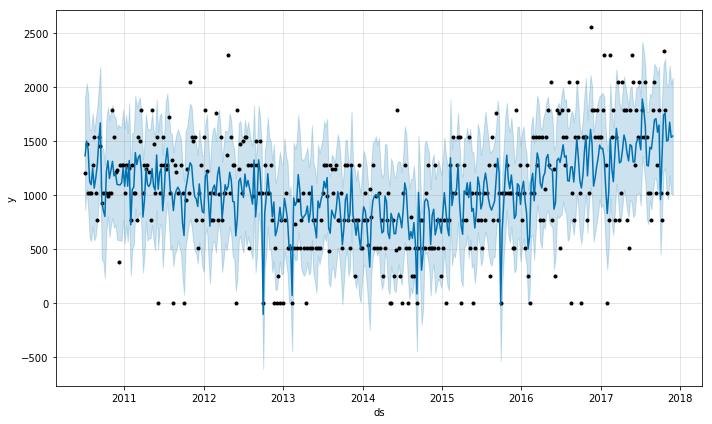

In [21]:
result_dict[227645]['mon']['model'].plot(result_dict[227645]['mon']['forecastProphetTable'])

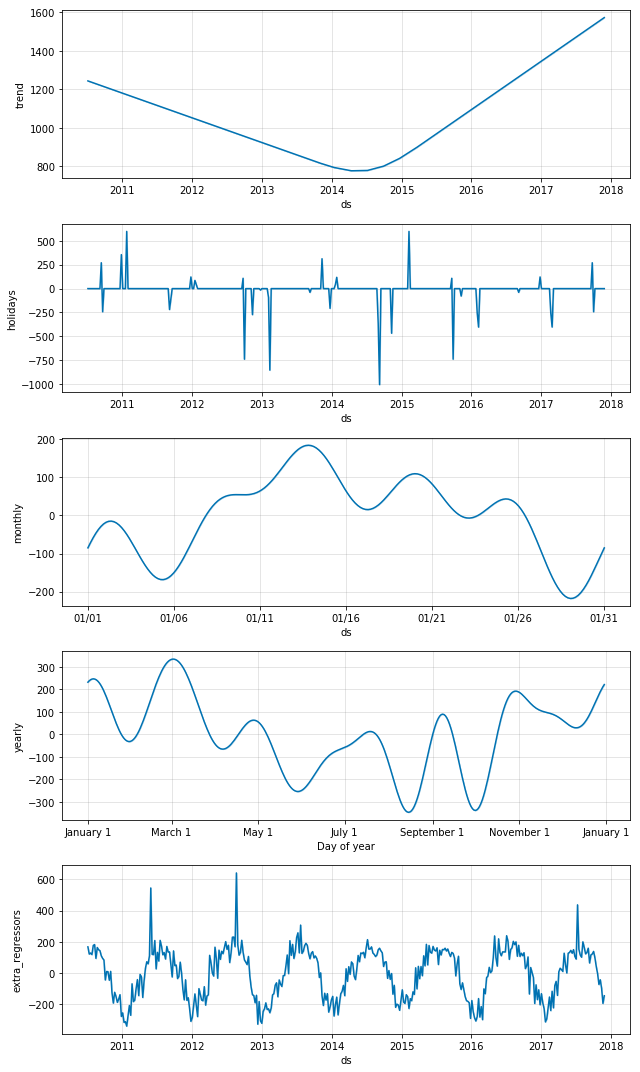

In [22]:
result_dict[227645]['mon']['model'].plot_components(result_dict[227645]['mon']['forecastProphetTable'])

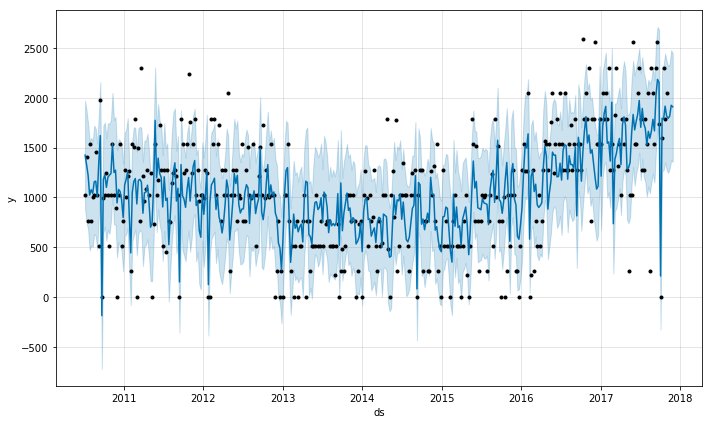

In [23]:
result_dict[227645]['tue']['model'].plot(result_dict[227645]['tue']['forecastProphetTable'])

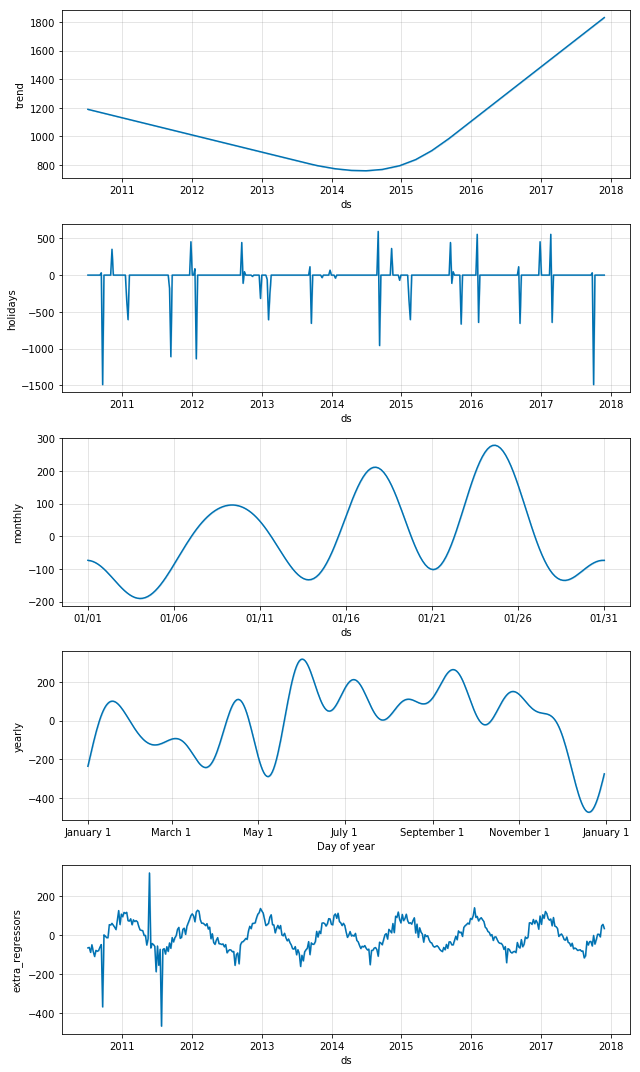

In [24]:
result_dict[227645]['tue']['model'].plot_components(result_dict[227645]['tue']['forecastProphetTable'])

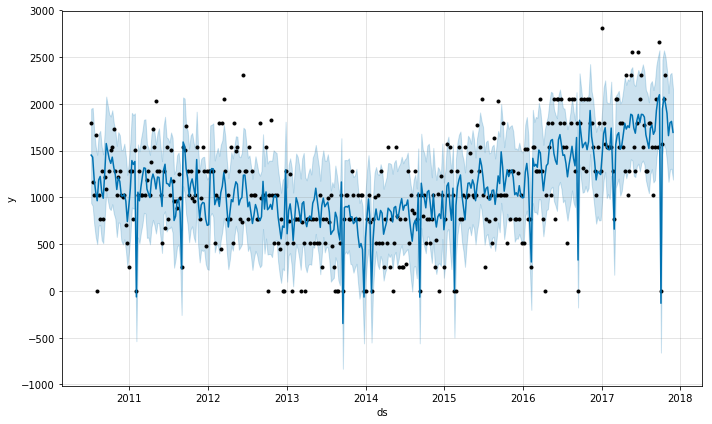

In [25]:
result_dict[227645]['wed']['model'].plot(result_dict[227645]['wed']['forecastProphetTable'])

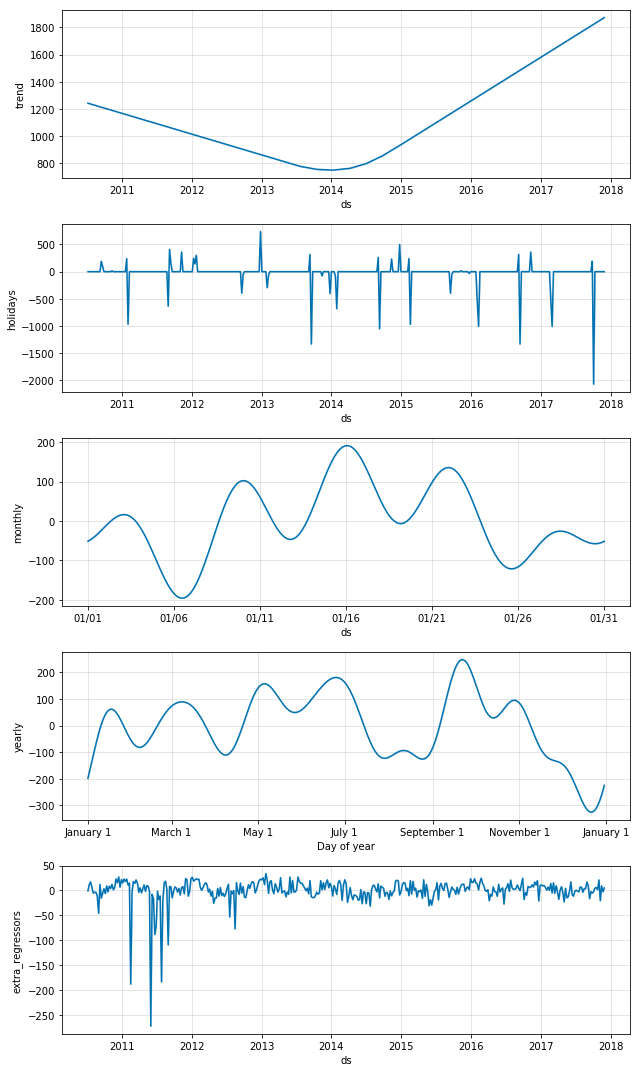

In [26]:
result_dict[227645]['wed']['model'].plot_components(result_dict[227645]['wed']['forecastProphetTable'])

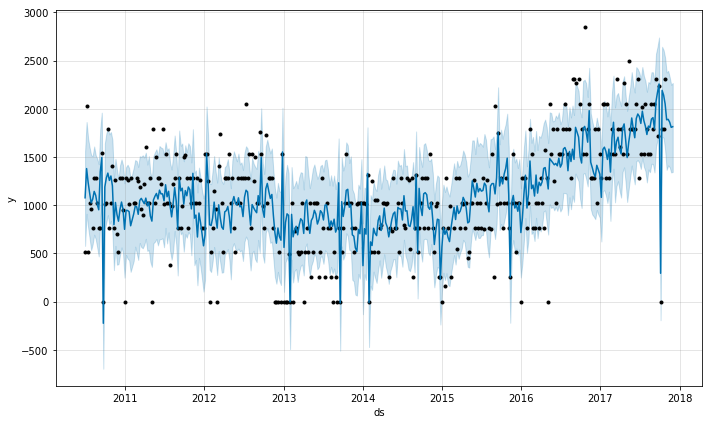

In [27]:
result_dict[227645]['thu']['model'].plot(result_dict[227645]['thu']['forecastProphetTable'])

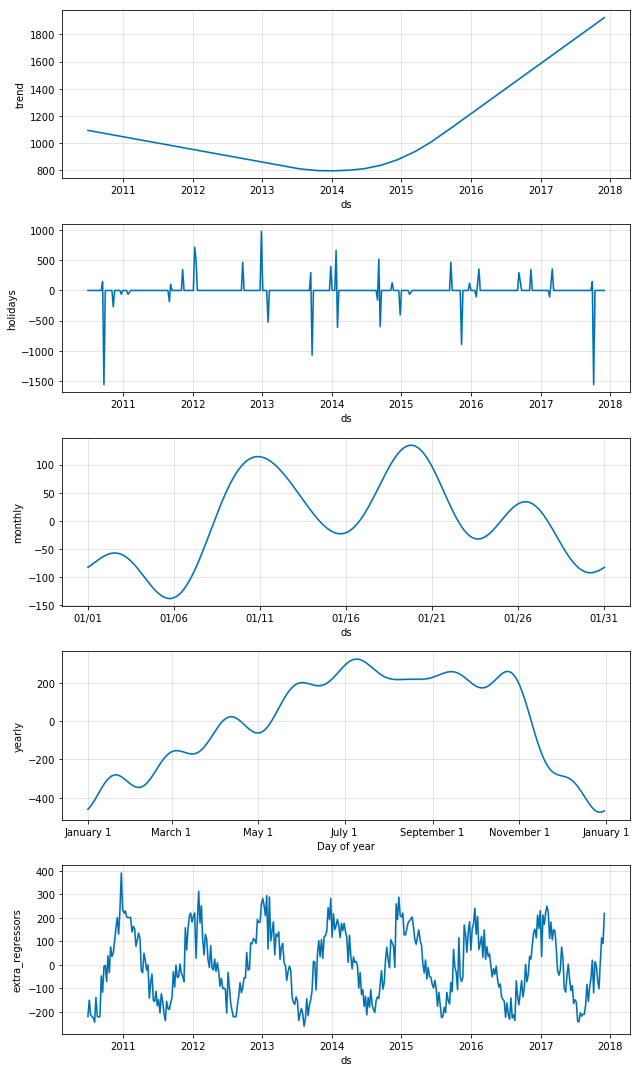

In [28]:
result_dict[227645]['thu']['model'].plot_components(result_dict[227645]['thu']['forecastProphetTable'])

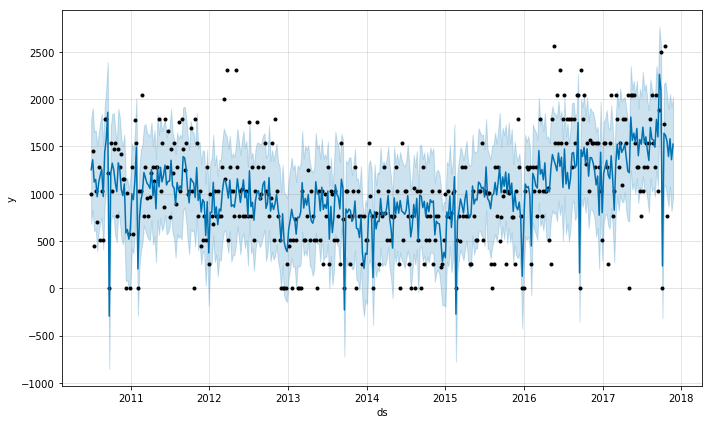

In [29]:
result_dict[227645]['pri']['model'].plot(result_dict[227645]['pri']['forecastProphetTable'])

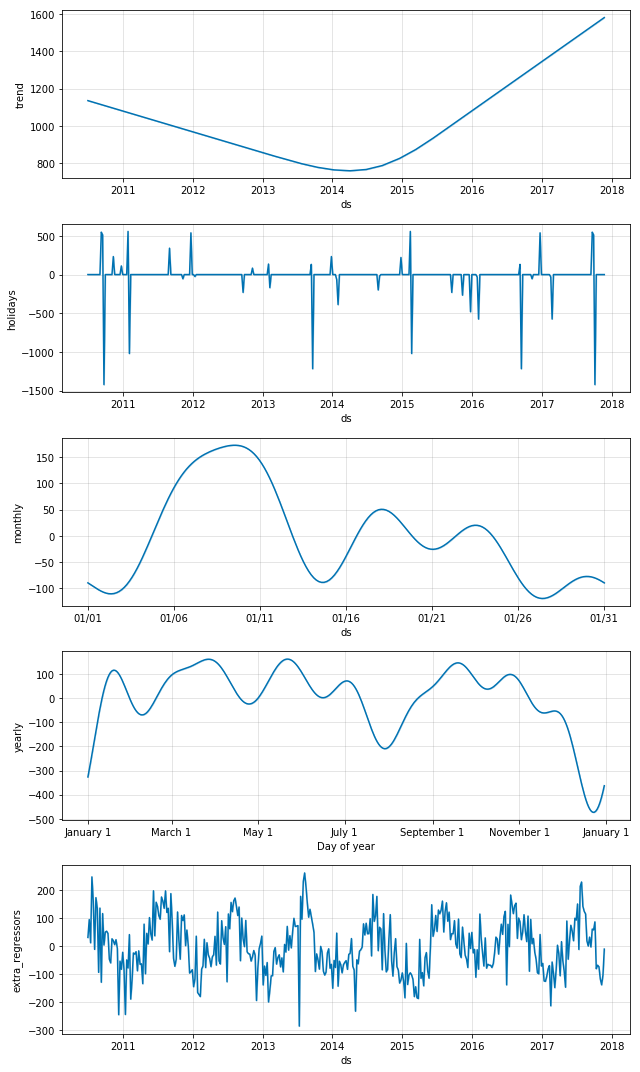

In [30]:
result_dict[227645]['pri']['model'].plot_components(result_dict[227645]['pri']['forecastProphetTable'])

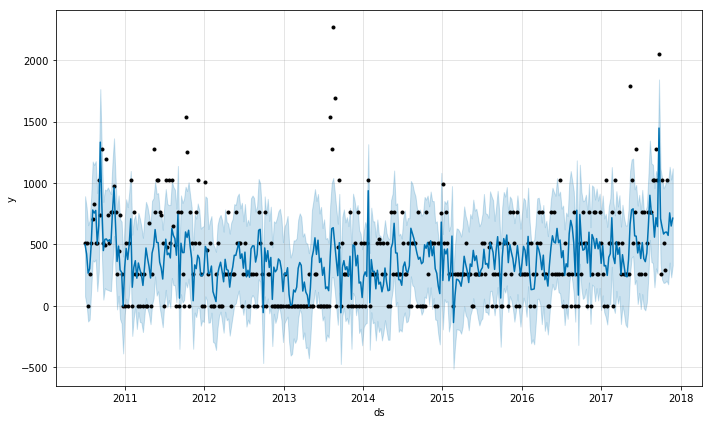

In [31]:
result_dict[227645]['sat']['model'].plot(result_dict[227645]['sat']['forecastProphetTable'])

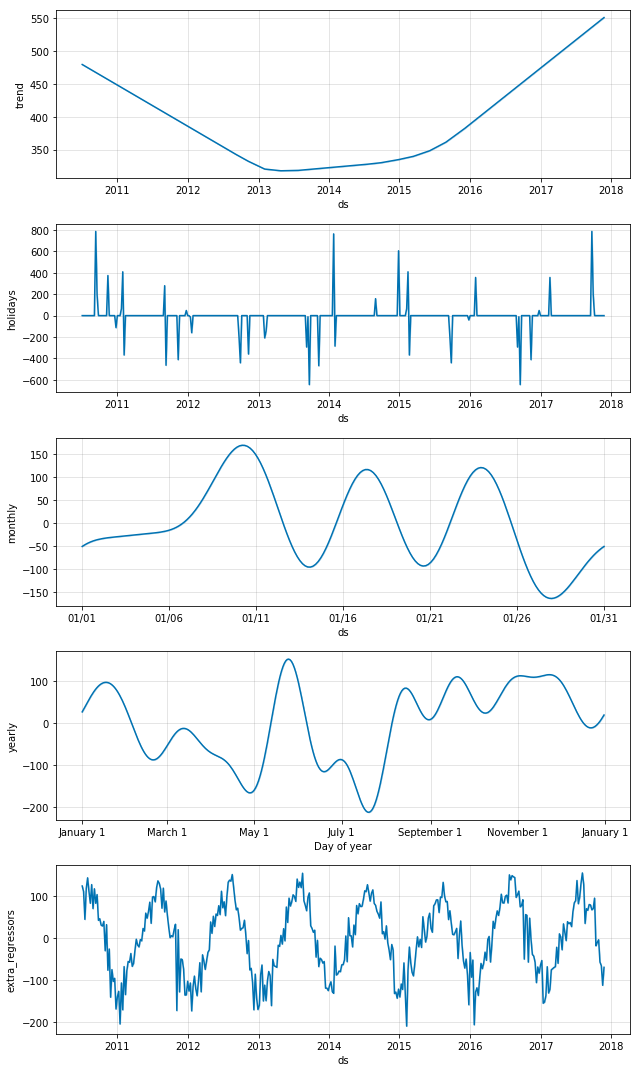

In [32]:
result_dict[227645]['sat']['model'].plot_components(result_dict[227645]['sat']['forecastProphetTable'])

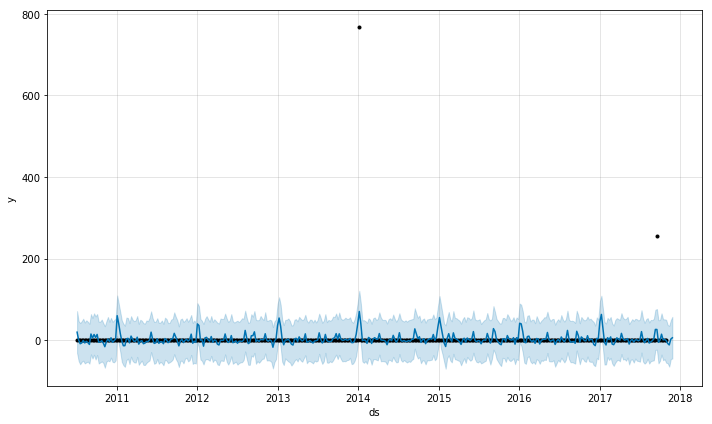

In [33]:
result_dict[227645]['sun']['model'].plot(result_dict[227645]['sun']['forecastProphetTable'])

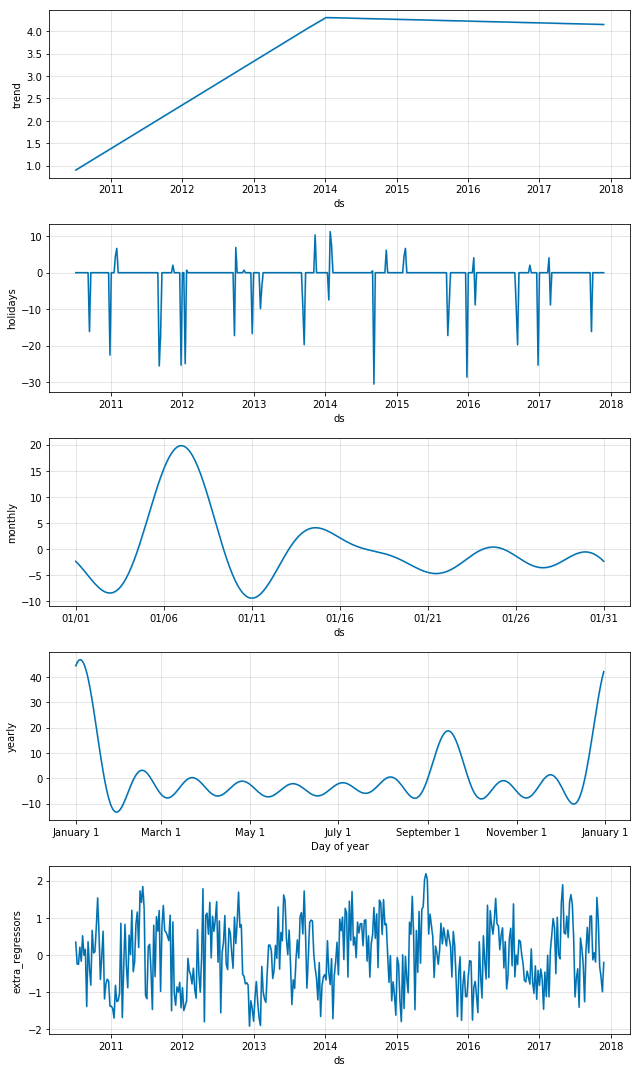

In [34]:
result_dict[227645]['sun']['model'].plot_components(result_dict[227645]['sun']['forecastProphetTable'])

In [35]:
merged_dict={}
for y in y_col:
    merged_dict[y]={'future': 
                    pd.concat([result_dict[227645]['mon']['forecastProphetTable'],\
                              result_dict[227645]['tue']['forecastProphetTable'],\
                              result_dict[227645]['wed']['forecastProphetTable'],\
                              result_dict[227645]['thu']['forecastProphetTable'],\
                              result_dict[227645]['pri']['forecastProphetTable'],\
                              result_dict[227645]['sat']['forecastProphetTable'],\
                              result_dict[227645]['sun']['forecastProphetTable']],\
                              axis= 0).sort_values(by='ds', axis=0),
                   'forecastProphetTable':
                    pd.concat([result_dict[227645]['mon']['forecastProphetTable'],\
                              result_dict[227645]['tue']['forecastProphetTable'],\
                              result_dict[227645]['wed']['forecastProphetTable'],\
                              result_dict[227645]['thu']['forecastProphetTable'],\
                              result_dict[227645]['pri']['forecastProphetTable'],\
                              result_dict[227645]['sat']['forecastProphetTable'],\
                              result_dict[227645]['sun']['forecastProphetTable']],\
                              axis= 0).sort_values(by='ds', axis=0)
                   }

In [36]:
merged_dict[227645]['forecastProphetTable']

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,chocostick,chocostick_lower,chocostick_upper,christmas,...,thanksgiving,thanksgiving_lower,thanksgiving_upper,thanksgivingbefore,thanksgivingbefore_lower,thanksgivingbefore_upper,yearly,yearly_lower,yearly_upper,yhat
0,2010-07-01,1094.589074,1094.589074,1094.589074,578.402409,1556.216439,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,289.800490,289.800490,289.800490,1077.130924
0,2010-07-02,1135.578750,1135.578750,1135.578750,683.612458,1783.877978,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,71.361205,71.361205,71.361205,1254.359127
0,2010-07-03,479.846800,479.846800,479.846800,75.581248,892.504359,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-90.015768,-90.015768,-90.015768,497.481816
0,2010-07-04,0.898779,0.898779,0.898779,-31.690528,71.004040,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.733644,-1.733644,-1.733644,19.288467
0,2010-07-05,1243.368229,1243.368229,1243.368229,867.055979,1900.794743,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-46.284289,-46.284289,-46.284289,1366.190299
0,2010-07-06,1189.395420,1189.395420,1189.395420,884.247053,1971.628904,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,209.504318,209.504318,209.504318,1424.840001
0,2010-07-07,1242.730821,1242.730821,1242.730821,939.829847,1948.337798,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,109.889359,109.889359,109.889359,1452.558000
1,2010-07-08,1092.801150,1092.801150,1092.801150,911.281230,1862.674803,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,322.875887,322.875887,322.875887,1380.125387
1,2010-07-09,1133.435119,1133.435119,1133.435119,831.003146,1906.696055,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40.141237,40.141237,40.141237,1359.284955
1,2010-07-10,478.640386,478.640386,478.640386,8.373106,803.806121,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-140.936094,-140.936094,-140.936094,421.910567


In [37]:
forecast_dict={}
for y in y_col:
    merged_dict[y]['future']['ds']= pd.to_datetime(merged_dict[y]['future']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    merged_dict[y]['forecastProphetTable']['ds']= pd.to_datetime(merged_dict[y]['forecastProphetTable']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    forecast_dict[y]= prpt.extract_info_from(merged_dict[y]['future'], merged_dict[y]['forecastProphetTable'], varr.FORECASTDAY)

            ds         yhat
381 2017-11-01  1900.245657
380 2017-11-02  1885.753761
383 2017-11-03  1394.514796
383 2017-11-04   573.034977
382 2017-11-05    -8.431749
381 2017-11-06  1509.771030
383 2017-11-07  1794.039275
382 2017-11-08  1660.717839
381 2017-11-09  1890.650772
384 2017-11-10  1581.935573
384 2017-11-11   756.794038
383 2017-11-12   -12.077813
382 2017-11-13  1677.582725
384 2017-11-14  1816.993210
383 2017-11-15  1797.461741
382 2017-11-16  1861.008762
385 2017-11-17  1359.336800
385 2017-11-18   649.714230
384 2017-11-19     2.118294
383 2017-11-20  1537.355170
385 2017-11-21  1925.940633
384 2017-11-22  1812.997810
383 2017-11-23  1807.305867
386 2017-11-24  1523.726263
386 2017-11-25   713.459089
385 2017-11-26     5.482328
384 2017-11-27  1549.234202
386 2017-11-28  1910.414201
385 2017-11-29  1695.389360
384 2017-11-30  1814.259883
            ds         yhat
381 2017-11-01  1900.245657
380 2017-11-02  1885.753761
383 2017-11-03  1394.514796
383 2017-11-04   573

In [38]:
forecast_dict

{227645: {'event_parameter_df':             ds     newyear  thanksgiving  chocostick   christmas  \
  10  2010-09-10    0.000000           0.0    0.000000    0.000000   
  10  2010-09-11    0.000000           0.0    0.000000    0.000000   
  10  2010-09-12    0.000000           0.0    0.000000    0.000000   
  10  2010-09-13    0.000000           0.0    0.000000    0.000000   
  10  2010-09-14    0.000000           0.0    0.000000    0.000000   
  10  2010-09-15    0.000000           0.0    0.000000    0.000000   
  11  2010-09-16    0.000000           0.0    0.000000    0.000000   
  11  2010-09-17    0.000000           0.0    0.000000    0.000000   
  11  2010-09-18    0.000000           0.0    0.000000    0.000000   
  18  2010-11-09    0.000000           0.0  351.713182    0.000000   
  17  2010-11-10    0.000000           0.0   15.241566    0.000000   
  19  2010-11-12    0.000000           0.0  232.327329    0.000000   
  19  2010-11-13    0.000000           0.0  374.067101    0.

In [39]:
forecast_dict[227645]['result_df']

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,chocostick,chocostick_lower,chocostick_upper,christmas,...,thanksgiving_lower,thanksgiving_upper,thanksgivingbefore,thanksgivingbefore_lower,thanksgivingbefore_upper,yearly,yearly_lower,yearly_upper,yhat_x,yhat_y
0,2017-11-01,1846.773495,1846.773495,1846.773495,1381.483981,2361.050485,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,85.864469,85.864469,85.864469,1900.245657,1900.245657
1,2017-11-02,1894.995221,1894.995221,1894.995221,1367.258256,2376.201189,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,175.040550,175.040550,175.040550,1885.753761,1885.753761
2,2017-11-03,1567.134248,1567.134248,1567.134248,863.545704,1897.553270,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,53.373982,53.373982,53.373982,1394.514796,1394.514796
3,2017-11-04,546.439582,546.439582,546.439582,174.665322,1003.341933,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,113.259529,113.259529,113.259529,573.034977,573.034977
4,2017-11-05,4.153819,4.153819,4.153819,-57.058724,36.969887,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-7.275860,-7.275860,-7.275860,-8.431749,-8.431749
5,2017-11-06,1557.850213,1557.850213,1557.850213,962.639455,2015.479968,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,157.895589,157.895589,157.895589,1509.771030,1509.771030
6,2017-11-07,1809.650389,1809.650389,1809.650389,1246.783673,2319.001208,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,86.657375,86.657375,86.657375,1794.039275,1794.039275
7,2017-11-08,1852.912009,1852.912009,1852.912009,1167.233033,2116.560606,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.889770,13.889770,13.889770,1660.717839,1660.717839
8,2017-11-09,1902.065810,1902.065810,1902.065810,1412.413938,2393.414849,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.456651,13.456651,13.456651,1890.650772,1890.650772
9,2017-11-10,1572.203436,1572.203436,1572.203436,1077.452579,2057.010618,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-20.479947,-20.479947,-20.479947,1581.935573,1581.935573
